## NumPy入門1
実際にデータをどの様に解析するのかは後々学ぶとして、ここでは機械学習で実際にどんなデータに向き合うことになるのか、またそれをPythonで扱うにはどの様にすればいいのかを学んでいこう。

### 1. cifar10のインポート
__cifar10__では、機械学習での学習に使用できる様な画像データが提供されている。さらにcifar10はkerasというライブラリの中の1つの機能として簡単にPythonで扱える様に整備されている。ただし、ここでcifar10から取り込んだデータセットはただちに学習に使用できる様綺麗に成形された後の一例のもの。実務ではこの様に綺麗なデータとなる様に整形するところから始める必要があることが多い。

まずはkerasのdatasetsからcifar10をインポートし、データをダウンロードしよう。

In [6]:
#!python -m pip install --upgrade pip
#!pip install keras
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 24.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 656.1 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 17.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 18.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 22.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 1.1 MB/s eta 0:00:00eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 25.0 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.6.1
    Uninstalling tensorboard-data-server-0.6.1:
      Successfully uninstalled tensorboard-data-server-0.6.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.0
  

In [9]:
from keras.datasets import cifar10

(input_train, output_train),(input_test, output_test)=cifar10.load_data()

### 2. データセットの構造

返り値は`(input_train, output_train)`と`(input_test, output_test)`の2つあり、なぜ2つあるのかは機械学習の内容で学ぶ。

それぞれの返り値はさらに2つの要素を持つタプルとなっている。

#### データの表示
ひとまず`input_train`と`output_train`を表示してみよう。

In [10]:
print(input_train)

[[[[ 59  62  63]
   [ 43  46  45]
   [ 50  48  43]
   ...
   [158 132 108]
   [152 125 102]
   [148 124 103]]

  [[ 16  20  20]
   [  0   0   0]
   [ 18   8   0]
   ...
   [123  88  55]
   [119  83  50]
   [122  87  57]]

  [[ 25  24  21]
   [ 16   7   0]
   [ 49  27   8]
   ...
   [118  84  50]
   [120  84  50]
   [109  73  42]]

  ...

  [[208 170  96]
   [201 153  34]
   [198 161  26]
   ...
   [160 133  70]
   [ 56  31   7]
   [ 53  34  20]]

  [[180 139  96]
   [173 123  42]
   [186 144  30]
   ...
   [184 148  94]
   [ 97  62  34]
   [ 83  53  34]]

  [[177 144 116]
   [168 129  94]
   [179 142  87]
   ...
   [216 184 140]
   [151 118  84]
   [123  92  72]]]


 [[[154 177 187]
   [126 137 136]
   [105 104  95]
   ...
   [ 91  95  71]
   [ 87  90  71]
   [ 79  81  70]]

  [[140 160 169]
   [145 153 154]
   [125 125 118]
   ...
   [ 96  99  78]
   [ 77  80  62]
   [ 71  73  61]]

  [[140 155 164]
   [139 146 149]
   [115 115 112]
   ...
   [ 79  82  64]
   [ 68  70  55]
   [ 67  69

In [11]:
print(output_train)

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


`input_train`も`output_train`も多重構造のリストの様なデータということがわかる。ただし`input_train`の方が構造が複雑。


#### データの型
データの型も調べておこう。データ型はどの様にして調べることができただろうか。

In [12]:
print(type(input_train))
print(type(output_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


listに似ているがlistではない様だ！
`numpy.ndarray`とは何だろう？

#### numpy.ndarray
実はこのデータ型は、numpyというライブラリに用意されたデータ型で、この様な多重構造を扱うのに非常に便利なnumpy arrayと呼ばれるクラス。ここでは単にarrayやarray型などと表記する。

次からは、実際にデータがどの様な構造をしているのかarrayの機能を用いて見ていこう。

#### 改めてデータセットの構造を確認しよう
とはいえ、膨大なデータ量なので全てを見るわけにはいかない。実際、見ても理解できない。
そんなときに使えるのは`shape`というarrayのメンバ変数。ここに、arrayのデータ構造が格納されている。

In [13]:
print(input_train.shape)
print(output_train.shape)

(50000, 32, 32, 3)
(50000, 1)


例えば(50000, 1)は50000行1列の行列を表している。

この結果から、`input_train`は(50000, 32, 32, 3)の要素数を持つ4階のテンソル、`output_train`は(50000, 1)の要素数を持つ2階のテンソル(行列)であることがわかる。

### 3. データの詳細


`input_train`は`[0, 0, 0]`の様に3次元のベクトルデータが32×32で並んでいるデータがあり、それが50000個存在している。

これは解像度が32×32ピクセルのカラー画像が50000個あるというデータである。


一方で`output_train`は`[0]`の様に1次元のベクトル(スカラー)が50000個存在している。

これは画像に写っているもののラベルを数値で表したものが50000個というデータである。

機械学習では、この様にラベルは文字列ではなく数値データに変換して扱うことでコンピュータでも解析しやすくしている。なお、各数値に対応するラベルは以下の様になる。

- 0: airplane（飛行機）
- 1: automobile（自動車）
- 2: bird（鳥）
- 3: cat（猫）
- 4: deer（鹿）
- 5: dog（犬）
- 6: frog（カエル）
- 7: horse（馬）
- 8: ship（船）
- 9: truck（トラック）

本題からは外れるが、ここでダウンロードした画像の一部を表示してみよう。なお、ここで必要なMatplotlibというライブラリは可視化で詳しく学ぶこととなる。

下記の`data_num`に0~49999のうち好きな数字を入れて確認してみよう。

This picture`s label is dog.


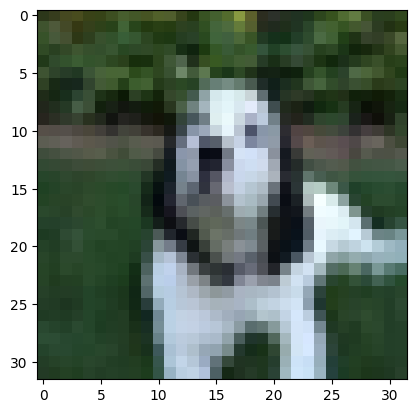

In [17]:
from matplotlib import pyplot as plt

data_num=324
data_labels=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

print('This picture`s label is {0}.'.format(data_labels[output_train[data_num][0]]))
plt.imshow(input_train[data_num])